In [2]:
!pip install scikit-learn
!pip install pandas

In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load your data
data = pd.read_csv('personal_transactions.csv')

# We will analyze for amount
X = data[['Amount']]

# Initialize the model
iso_forest = IsolationForest(contamination=0.005)  #We want a low contamination

# Fit the model
iso_forest.fit(X)

# Get anomaly scores and labels
data['anomaly_score'] = iso_forest.decision_function(X)
data['is_anomaly'] = iso_forest.predict(X)

# Filter the anomalies (outliers)
anomalies = data[data['is_anomaly'] == -1]

# Print the anomalies
print("Anomalies detected using Isolation Forest:")
print(anomalies)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomalies detected using Isolation Forest:
           Date              Description   Amount Transaction Type  \
3    01/03/2018      Credit Card Payment  2298.09           credit   
172  05/11/2018  Mike's Construction Co.  8000.00            debit   
676  06/20/2019  Mike's Construction Co.  9200.00            debit   

                Category   Account Name  anomaly_score  is_anomaly  
3    Credit Card Payment  Platinum Card      -0.017564          -1  
172     Home Improvement       Checking      -0.104114          -1  
676     Home Improvement       Checking      -0.116789          -1  


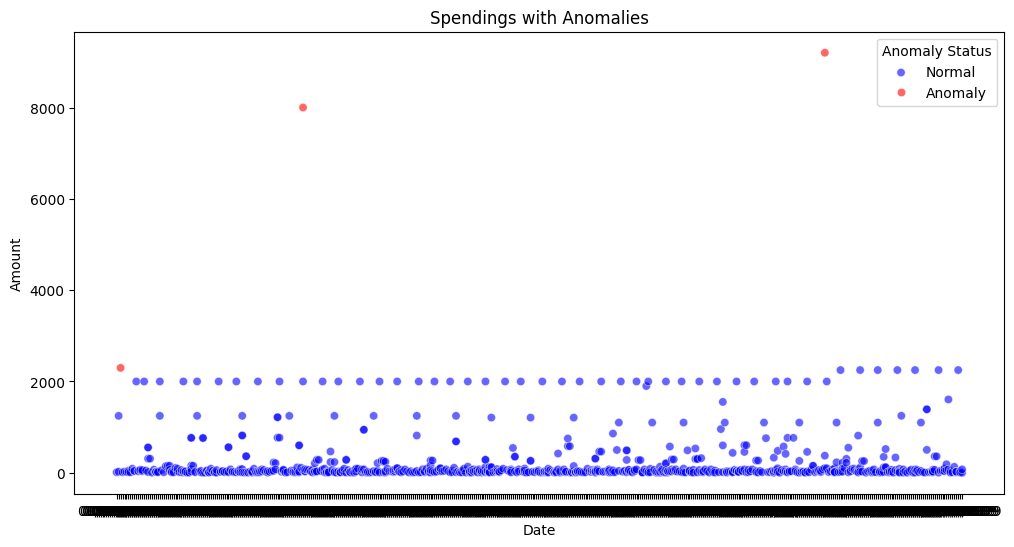

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(12, 6))

# Plot normal data points
sns.scatterplot(x=data['Date'], y=data['Amount'], hue=data['is_anomaly'], palette={1: 'blue', -1: 'red'}, alpha=0.6)

# Customize the plot
plt.title('Spendings with Anomalies')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(title='Anomaly Status', labels=['Normal', 'Anomaly'])
plt.show()
